In [14]:
!pip install tensorflow stable-baselines gym-anytrading gym

In [48]:
import gym
import gym_anytrading

from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3 import A2C

import tf_slim as slim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch as th
from stable_baselines3.common.policies import ActorCriticPolicy


In [20]:
df = pd.read_csv('data/gmedata.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume
0,07/24/2023,22.42,23.04,22.20,23.04,"2,970,433"
1,07/21/2023,23.05,23.22,22.16,22.18,"3,167,916"
2,07/20/2023,23.01,23.22,22.66,22.91,"2,256,659"
3,07/19/2023,23.42,23.58,22.96,23.17,"2,250,133"
4,07/18/2023,22.72,23.80,22.68,23.08,"2,345,137"


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [23]:
#We have to set date as index because that's how gym trading expects to recieve data
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-24,22.42,23.04,22.20,23.04,"2,970,433"
2023-07-21,23.05,23.22,22.16,22.18,"3,167,916"
2023-07-20,23.01,23.22,22.66,22.91,"2,256,659"
2023-07-19,23.42,23.58,22.96,23.17,"2,250,133"
2023-07-18,22.72,23.80,22.68,23.08,"2,345,137"


In [25]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=5)

In [26]:
env.signal_features

array([[ 2.282e+01,  0.000e+00],
       [ 2.297e+01,  1.500e-01],
       [ 2.346e+01,  4.900e-01],
       [ 2.344e+01, -2.000e-02],
       [ 2.391e+01,  4.700e-01],
       [ 2.354e+01, -3.700e-01],
       [ 2.271e+01, -8.300e-01],
       [ 2.283e+01,  1.200e-01],
       [ 2.390e+01,  1.070e+00],
       [ 2.491e+01,  1.010e+00],
       [ 2.425e+01, -6.600e-01],
       [ 2.490e+01,  6.500e-01],
       [ 2.498e+01,  8.000e-02],
       [ 2.358e+01, -1.400e+00],
       [ 2.302e+01, -5.600e-01]])

In [27]:
env.action_space

Discrete(2)

info {'total_reward': 1.259999999999998, 'total_profit': 1.0240378848832545, 'position': 0}


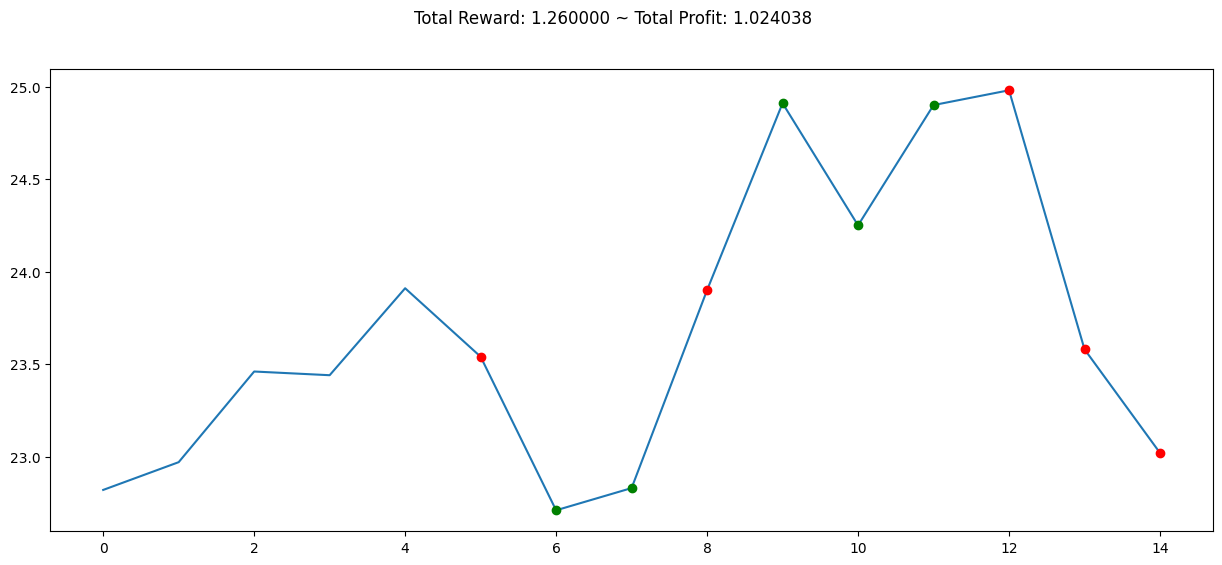

In [29]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show() 

In [39]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [50]:
model = A2C('MlpPolicy', env , verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 299      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | -11.4    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0195  |
|    value_loss         | 0.00185  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 310      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | -0.586   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.0139   |
|    value_loss      

In [59]:
#Evaluation
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action,_states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1.2699999999999996, 'total_profit': 1.0244491450779867, 'position': 1}


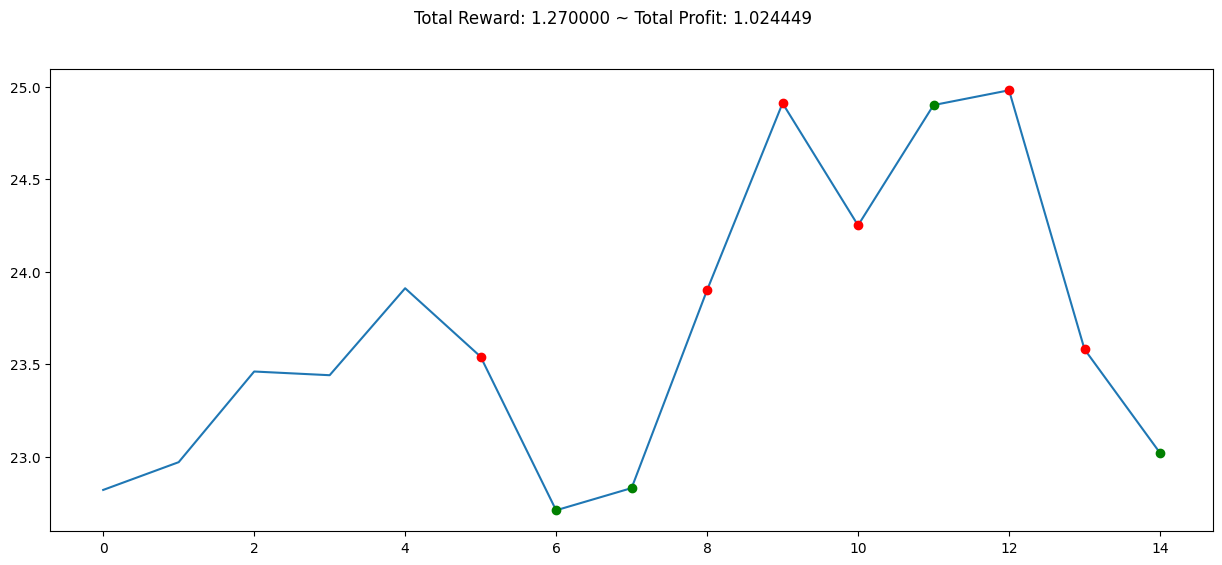

In [60]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show() 